### Final Project of Computational Intelligence
Under Supervision of Dr. Shamee

University of Kashan

Spring 2024

Abolfazl Aghdaee 9811152202

In [1]:
pip install keras==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import FunctionTransformer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Model





import warnings
warnings.filterwarnings('ignore')

الف) در اینجا دیتاست سی فار10 لود شده است و تبدیل به دو مجموعه مجزا شده است

In [3]:
(X_train, y_train),(X_test, y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


ب) در اینجا ما مجموعه اصلی رو به سه بخش تقسیم کرده ایم 
- X_train
- X_test
- y_valid

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

تعداد هر یک از مجموعه های زیر رو میتوان در سلول های زیر دید

- X_train
- X_test
- y_valid

In [6]:
X_train.shape, y_train.shape

((45000, 32, 32, 3), (45000, 1))

In [7]:
X_valid.shape, y_train.shape

((5000, 32, 32, 3), (45000, 1))

In [8]:
X_valid.shape, y_valid.shape

((5000, 32, 32, 3), (5000, 1))

In [9]:
X_train[0].shape

(32, 32, 3)

array([[[ 18,  12,  24],
        [ 22,  16,  28],
        [ 27,  21,  33],
        ...,
        [ 26,  19,  30],
        [ 14,  11,  18],
        [ 11,  10,  16]],

       [[ 18,  12,  24],
        [ 21,  15,  27],
        [ 25,  19,  31],
        ...,
        [ 27,  23,  32],
        [ 21,  21,  27],
        [ 17,  18,  24]],

       [[ 23,  17,  29],
        [ 22,  16,  28],
        [ 20,  14,  26],
        ...,
        [ 29,  28,  37],
        [ 25,  26,  32],
        [ 21,  25,  30]],

       ...,

       [[ 44,  24,  35],
        [ 48,  26,  38],
        [ 55,  31,  43],
        ...,
        [130, 131, 159],
        [105, 104, 127],
        [ 65,  60,  82]],

       [[ 25,  17,  27],
        [ 29,  21,  31],
        [ 38,  28,  38],
        ...,
        [125, 127, 155],
        [ 91,  89, 113],
        [ 49,  42,  64]],

       [[ 16,  13,  20],
        [ 19,  16,  24],
        [ 22,  18,  27],
        ...,
        [101, 100, 125],
        [ 55,  51,  72],
        [ 26,  19,  37]]], dtype=uint8)
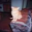

In [10]:
X_train[0]

In [11]:
class_names[y_train[0][0]]

'cat'

In [12]:
y_train[0]

array([3], dtype=uint8)

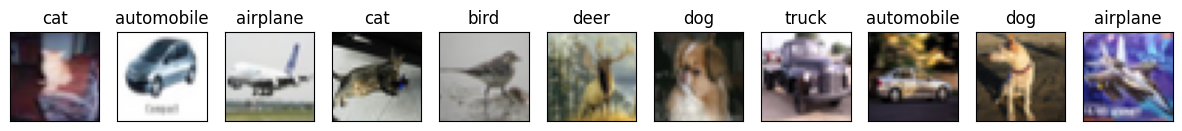

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(15, 15))


for i in range(11):

    plt.subplot(1, 11, i+1)
    plt.xticks([])
    plt.yticks([])


    plt.imshow(X_train[i])


    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

## Preprocessing

In [15]:
def normalizer(img):
  return img.astype('float32') /255.0


normalizer = FunctionTransformer(normalizer, validate=False)


In [16]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [17]:
def augment_images(images, labels, n_img=2):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        image = image.reshape((1,) + image.shape)



        for _ in range(n_img):


            augmented_batch = datagen.flow(image, batch_size=1, shuffle=False)
            augmented_image = next(augmented_batch)[0]
            augmented_images.append(augmented_image)
            augmented_labels.append(label)


    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)
    return np.concatenate([images, augmented_images], axis=0), np.concatenate([labels, augmented_labels], axis=0)




augmenter = FunctionTransformer(lambda x: augment_images(x, y_train, n_img=2)[0], validate=False)

در اینجا پایپ لاین تشکیل شده و در سلول بعدی روی داده ترین ست شده است

پایپ لاین شامل: 
- normaliztion 
- augmentation

می باشد 

منظور از 

augmentation

تغییراتی است که روی داده ها اعمال میشود تا داده ها بیشتر شوند و مدل بهتری بسازد
مثلا مثل روتیت کردن یا برعکس کردن عکس 

In [18]:
pipeline = Pipeline([
    ('normalize', normalizer),
     ('augmenter',augmenter),
    ])

In [ ]:
X_train = pipeline.fit_transform(X_train)

In [ ]:
n_img = 2
y_train = np.concatenate([y_train]*(n_img + 1), axis=0)

In [20]:
X_train = normalizer.fit_transform(X_train)

In [21]:
X_valid = normalizer.transform(X_valid)
X_test = normalizer.transform(X_test)

In [22]:
y_train =  to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

در اینجا از مدل از پیش آموزش دیده شده استفاده شده است که با استفاده از مقادیر مختلف ابر پارامتر و با استفاده از کلاس های مختلف در سایکیت لرن تنظیم شده است 

### VGG16


![](img/illu_VGG_Plan-de-travail-1.png)

In [23]:
def vgg16_model(n_neurons=256, optimizer='Adam'):

    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    for layer in base_model.layers[0:-3]:
        layer.trainable = False


    x = tf.keras.layers.Flatten()(base_model.output)
    x = tf.keras.layers.Dense(n_neurons, activation='relu')(x)
    output = tf.keras.layers.Dense(10, activation='softmax')(x)


    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [24]:
vgg16_model = KerasClassifier(build_fn=vgg16_model, verbose=1)


In [25]:
grid = {'n_neurons': [256, 512], 'optimizer': ['SGD', 'Adam'], 'epochs': [2, 3], 'batch_size': [32, 64]}


In [26]:
grid = GridSearchCV(estimator=vgg16_model, param_grid=grid, n_jobs=-1, cv=3)


In [27]:
grid_result = grid.fit(X_train, y_train)


Epoch 1/3
704/704 [==============================] - 15s 16ms/step - loss: 1.1647 - accuracy: 0.5934
Epoch 2/3
704/704 [==============================] - 11s 15ms/step - loss: 0.9288 - accuracy: 0.6757
Epoch 3/3
704/704 [==============================] - 11s 15ms/step - loss: 0.8307 - accuracy: 0.7087


In [28]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.682933 using {'batch_size': 64, 'epochs': 3, 'n_neurons': 512, 'optimizer': 'Adam'}


همانطور که تصویر زیر مشخص است با توجه داشتن دو مقدار در هر ابر پارامتر شامل:
- تابع بهینه ساز
- تعداد ایپاک 2و3 
- تعداد بچ سایز 32و64
- نرون ها در ام ال پی 512و 256 
 
همانطور که تصویر نشان داده شده است با جی پی یو تی 4 گوگل که بهترین نسخه جی پی یو در دسترس هست 
حدود `47 دقیقه` طول کشیده است تا مدل آموزش داده شود.

بنابراین با تعداد ایپاک بیشتر این مدت زمان بیشتر خواهد بود و چون محدودیت زمانی در گوگل کولب وجود دارداین مقدار را 2 یا3 انتخاب کردم که زمان زیادی نگیرد

و یک نکته ای که وجود دارد با انتخاب ایپاک بیشتر احتمال افزایش صحت زیاد است 
در ادامه بدون استفاده از تنظیم این کار را با تعداد ایپاک بیشتر انجام داده ام 

![](img/Screenshot.png)
![](img/Screenshot%202024-06-18%20104212.png)

مدل دیگر

## VGG19

In [55]:
def vgg19_model(n_neurons=256, optimizer='Adam'):

    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    for layer in base_model.layers[0:-2]:
        layer.trainable = False

    x = tf.keras.layers.Flatten()(base_model.output)
    x = tf.keras.layers.Dense(n_neurons, activation='relu')(x)
    output = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [56]:
vgg19_model = KerasClassifier(build_fn=vgg19_model, verbose=1)


In [57]:
grid = {'n_neurons': [256, 512], 'optimizer': ['SGD', 'Adam'], 'epochs': [2, 3], 'batch_size': [32, 64]}


In [58]:
grid = GridSearchCV(estimator=vgg16_model, param_grid=grid, n_jobs=-1, cv=3)

In [59]:
grid_result_vgg19 = grid.fit(X_train, y_train)


Epoch 1/3
704/704 [==============================] - 13s 16ms/step - loss: 1.1687 - accuracy: 0.5926
Epoch 2/3
704/704 [==============================] - 11s 16ms/step - loss: 0.9241 - accuracy: 0.6774
Epoch 3/3
704/704 [==============================] - 11s 16ms/step - loss: 0.8348 - accuracy: 0.7062


In [60]:
print("Best: %f using %s" % (grid_result_vgg19.best_score_, grid_result_vgg19.best_params_))

Best: 0.675667 using {'batch_size': 64, 'epochs': 3, 'n_neurons': 512, 'optimizer': 'Adam'}


در ادامه هر دو مدل از پیش ترین شده استفاده شده است اما با مقدار ایپاک بیشتر و همچنین تابع های هزینه و صحت و ماتریس در همریختگی یا confusion matrix آنها نیز رسم شده است 

In [29]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [30]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [31]:
for layer in vgg_model.layers[0:-3]:
    layer.trainable = False

In [32]:
model1_vgg = keras.Sequential()
model1_vgg.add(vgg_model)
model1_vgg.add(keras.layers.Flatten())
model1_vgg.add(keras.layers.Dense(256, activation='relu'))
model1_vgg.add(keras.layers.Dropout(0.5))
model1_vgg.add(keras.layers.BatchNormalization())
model1_vgg.add(keras.layers.Dense(256, activation='relu'))
model1_vgg.add(keras.layers.Dropout(0.5))

model1_vgg.add(keras.layers.Dense(10, activation='softmax'))


In [33]:
model1_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                        

In [34]:
model1_vgg.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [35]:
hist1 = model1_vgg.fit(X_train, y_train, batch_size =64, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10
704/704 [==============================] - 19s 19ms/step - loss: 1.6031 - accuracy: 0.4206 - val_loss: 1.1803 - val_accuracy: 0.5884
Epoch 2/10
704/704 [==============================] - 13s 18ms/step - loss: 1.1749 - accuracy: 0.6007 - val_loss: 1.0607 - val_accuracy: 0.6254
Epoch 3/10
704/704 [==============================] - 14s 19ms/step - loss: 1.0533 - accuracy: 0.6484 - val_loss: 0.9698 - val_accuracy: 0.6708
Epoch 4/10
704/704 [==============================] - 13s 19ms/step - loss: 0.9655 - accuracy: 0.6796 - val_loss: 1.0181 - val_accuracy: 0.6478
Epoch 5/10
704/704 [==============================] - 13s 19ms/step - loss: 0.8971 - accuracy: 0.7014 - val_loss: 0.9947 - val_accuracy: 0.6766
Epoch 6/10
704/704 [==============================] - 13s 18ms/step - loss: 0.8459 - accuracy: 0.7186 - val_loss: 0.9107 - val_accuracy: 0.6892
Epoch 7/10
704/704 [==============================] - 13s 18ms/step - loss: 0.7981 - accuracy: 0.7369 - val_loss: 0.8564 - val_accuracy:

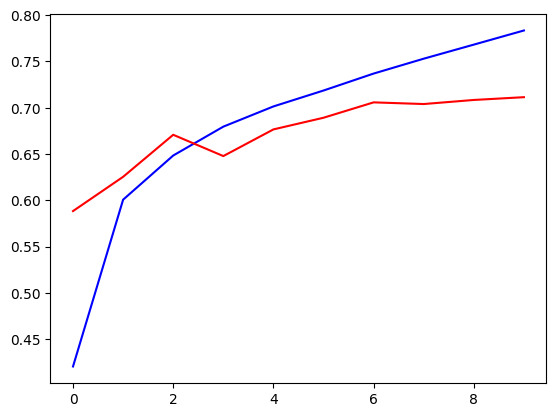

In [36]:
plt.plot(hist1.history['accuracy'], color= 'b')
plt.plot(hist1.history['val_accuracy'], color= 'r')

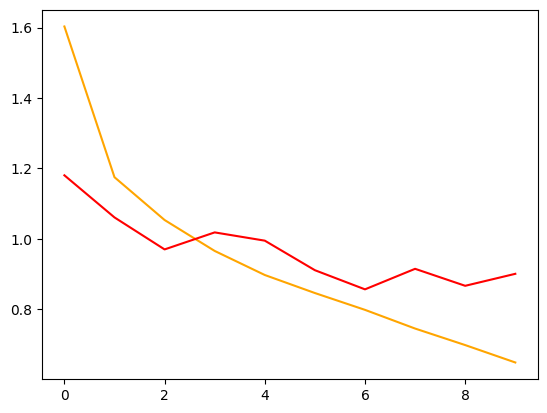

In [37]:
plt.plot(hist1.history['loss'], color= 'orange')
plt.plot(hist1.history['val_loss'], color= 'r')

313/313 [==============================] - 4s 8ms/step
[[817  24  35  13   6   5  14   6  63  17]
 [ 24 790   9  12   6   6  23   0  50  80]
 [ 61   4 634  43  53  33 134  18   9  11]
 [ 18  11  77 479  34 155 144  30  29  23]
 [ 33   9  80  52 531  31 176  60  14  14]
 [ 14   5  50 149  41 600  75  44   6  16]
 [  8   9  35  24  20  28 858   1  13   4]
 [ 25   1  40  40  54  45  28 732   6  29]
 [ 61  30  14   8   4   2  11   5 851  14]
 [ 40  96   9  20   6  10  18  12  58 731]]


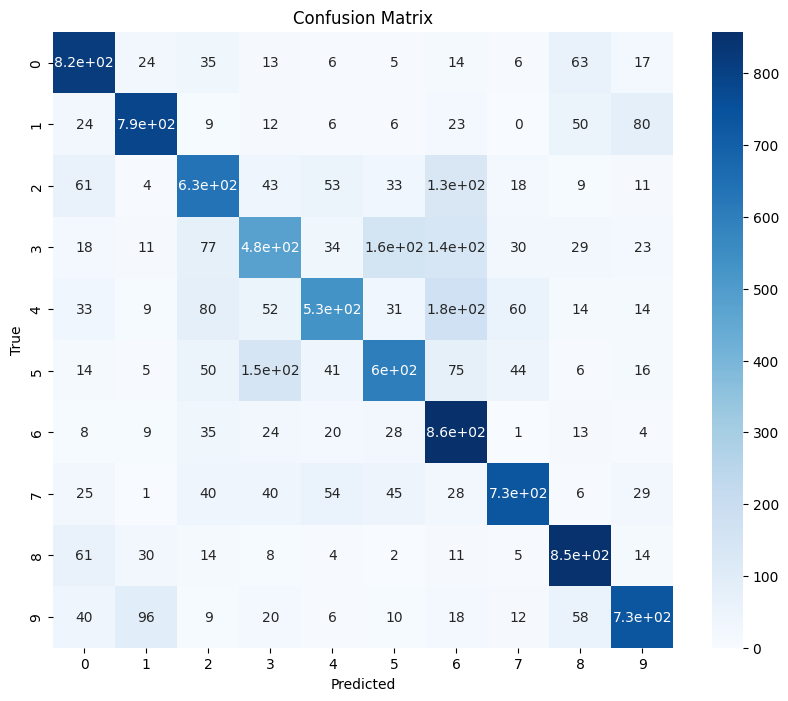

In [38]:
y_pred_model1_vgg = model1_vgg.predict(X_test)
y_pred = np.argmax(y_pred_model1_vgg, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [40]:
for layer in vgg19_model.layers[0:-2]:
    layer.trainable = False

In [41]:
model2_vgg = keras.Sequential()
model2_vgg.add(vgg19_model)
model2_vgg.add(keras.layers.Flatten())
model2_vgg.add(keras.layers.Dense(256, activation='relu'))
model2_vgg.add(keras.layers.Dropout(0.5))
model2_vgg.add(keras.layers.BatchNormalization())
model2_vgg.add(keras.layers.Dense(256, activation='relu'))
model2_vgg.add(keras.layers.Dropout(0.5))

model2_vgg.add(keras.layers.Dense(10, activation='softmax'))


In [42]:
model2_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                      

In [43]:
model2_vgg.compile(optimizer =tf.keras.optimizers.Adam(), loss ='categorical_crossentropy', metrics = ['accuracy'])

In [44]:
hist2 = model2_vgg.fit(X_train, y_train, batch_size =64, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10
704/704 [==============================] - 16s 19ms/step - loss: 1.7022 - accuracy: 0.3880 - val_loss: 1.3823 - val_accuracy: 0.5068
Epoch 2/10
704/704 [==============================] - 13s 18ms/step - loss: 1.4801 - accuracy: 0.4719 - val_loss: 1.3594 - val_accuracy: 0.5166
Epoch 3/10
704/704 [==============================] - 13s 18ms/step - loss: 1.3498 - accuracy: 0.5282 - val_loss: 1.1971 - val_accuracy: 0.5762
Epoch 4/10
704/704 [==============================] - 13s 18ms/step - loss: 1.2782 - accuracy: 0.5588 - val_loss: 1.2146 - val_accuracy: 0.5738
Epoch 5/10
704/704 [==============================] - 12s 17ms/step - loss: 1.2344 - accuracy: 0.5734 - val_loss: 1.1674 - val_accuracy: 0.5954
Epoch 6/10
704/704 [==============================] - 13s 18ms/step - loss: 1.1978 - accuracy: 0.5908 - val_loss: 1.1836 - val_accuracy: 0.5870
Epoch 7/10
704/704 [==============================] - 12s 17ms/step - loss: 1.1592 - accuracy: 0.6064 - val_loss: 1.1053 - val_accuracy:

In [45]:
X_train.shape,y_train.shape

((45000, 32, 32, 3), (45000, 10))

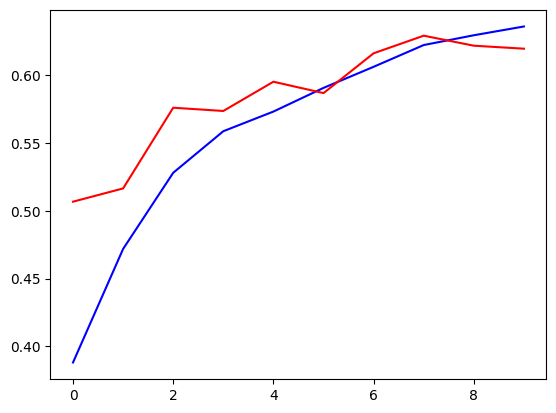

In [46]:
plt.plot(hist2.history['accuracy'], color= 'b')
plt.plot(hist2.history['val_accuracy'], color= 'r')

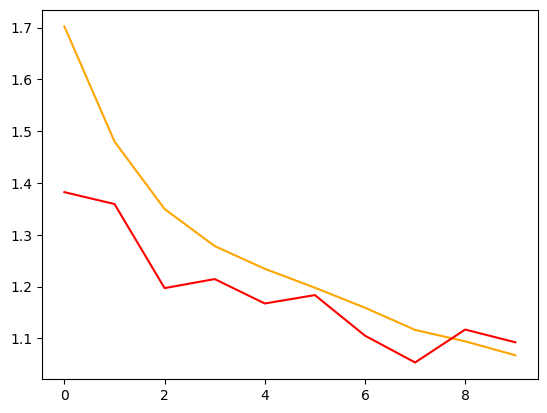

In [47]:
plt.plot(hist2.history['loss'], color= 'orange')
plt.plot(hist2.history['val_loss'], color= 'r')

313/313 [==============================] - 3s 9ms/step


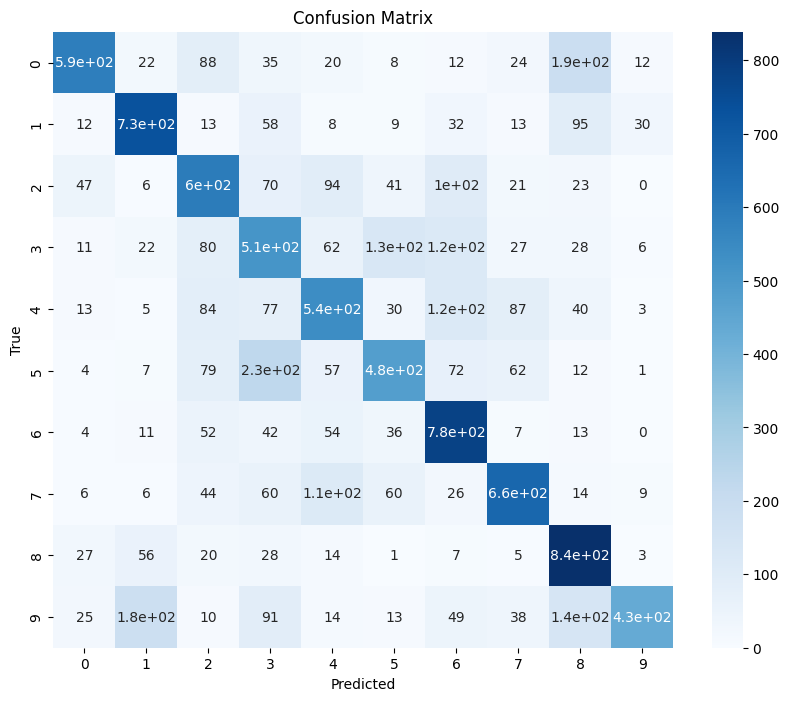

In [48]:
y_pred_model2_vgg = model2_vgg.predict(X_test)
y_pred = np.argmax(y_pred_model2_vgg, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, cmap ='Blues', annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### End!